<p style="font-size:14px; text-align: right">CoastWatch Python Exercises</p>  

# Python Basics: a tutorial for the NOAA Satellite Workshop
> history | uodated May 2021  
> owner | NOAA CoastWatch West Coast Node

## In this exercise, you will use Python to download data and metadata from ERDDAP.

### The exercise demonstrates the following skills: 

* Using Python to retrieve information about a dataset from ERDDAP
* Getting data from a remote CSV file
* Downloading satellite data from ERDDAP in netCDF format
* Extracting data with Python

For the examples in this exercise we will use the NOAA GeoPolar Sea Surface temperature  dataset from the CoastWatch West Coast Node (ERDDAP ID = nesdisGeoPolarSSTN5SQNRT).  
https://coastwatch.pfeg.noaa.gov/erddap/griddap/nesdisGeoPolarSSTN5SQNRT.graph  

The dataset contains monthly composites of SSS and has low spatial resolution (0.25 degrees), which will help prevent overloading the local intenet bandwidth during the class.  

### The scripts in this exercise are written in Python 3.7.    

1. Get set up
Import python modules
Make sure that the following libraries are installed in your Python 3 environment. The only library that might be difficult is Basemap. To use it you might have to define the environmental variable 'PROJ_LIB'. Search for the file 'epsg'. It should be somewhere in your Python folders. Use the path to that folder in the 'PROJ_LIB' environmental variable (see below).

# Get set up
## Import some basic python modules

In [2]:
import pkg_resources


## Look for python modules you might not have installed
We will be using the xarray, numpy, and pandas modules for this exercise. Make sure that they are installed in your Python 3 environment. A quick way to do this is with the script below

In [3]:
# Create a set 'curly brackets' of the modules to look for
# You can put any modules that you want to in the set
required = {'xarray', 'numpy', 'pandas'}

# look for the installed packages
installed = {pkg.key for pkg in pkg_resources.working_set}

# Find which modules are missing
missing = required - installed
if len(missing)==0:
    print('All modules are installed')
else:
    print('These modules are missing', ', '.join(missing))

All modules are installed


#### If you find missing modules, please go to the appendix at the bottom of the page for installation instructions.

## Import the modules

In [6]:
import numpy as np  # for matrix operations
import numpy.ma as ma  # for masking arrays
import pandas as pd  # for tabular data
import xarray as xr  # for gridded data

# Getting information about a dataset 
## First, open a pointer to an ERDDAP dataset, using the xarray `open_dataset` function. 
> xr.open_dataset('full_url_to_erddap_dataset')  

__`'full_url_to_erddap_dataset'` is full URL to the dataset, which is comprised of:__  
* the base url to the ERDDAP you are using, plus
* the dataset ID.  

### So, for our dataset:    
* base_URL = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'
* dataset_id = 'jplSMAPSSSv42_mday'
* full_URL = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplSMAPSSSv42_mday'

### Code that works is listed below:   
```python
base_URL = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'
dataset_id = 'nesdisGeoPolarSSTN5SQNRT'
full_URL = '/'.join([base_URL, dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)
```

### But, let's put it in a function to make it more versatile

```python
def point_to_dataset(dataset_id, base_url='https://coastwatch.pfeg.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    #print(full_url)
    # xr.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/coastwatchSMOSv662SSS3day')
    return xr.open_dataset(full_url)
```

#### Where:  
* dataset_id is the ERDDAP id for the dataset of interest. For this example: 'nesdisGeoPolarSSTN5SQNRT'
* base_url is the url of the ERDDAP you are pulling data from. For this example, the West Coast Node ERDDAP at 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'
* full_url is the full URL to the ERDDAP dataset created by joining base_url and dataset_id
* the pointer to the dataset is returned

The default base_url the West Coast Node ERDDAP 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'. So, you get our dataset, the function call could be as simple as:
```python
point_to_dataset('nesdisGeoPolarSSTN5SQNRT')
```  
Or you could specify the dataset_id
```python
point_to_dataset(dataset_id = 'nesdisGeoPolarSSTN5SQNRT')
```
You could also specify a different base_url.
```python
point_to_dataset('nesdisGeoPolarSSTN5SQNRT', 'https://upwell.pfeg.noaa.gov/erddap/griddap')

point_to_dataset(dataset_id = 'nesdisGeoPolarSSTN5SQNRT', 
                 base_url = 'https://upwell.pfeg.noaa.gov/erddap/griddap')
```

In [101]:
# Define the function
def point_to_dataset(dataset_id, base_url='https://coastwatch.pfeg.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    #print(full_url)
    # xr.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/coastwatchSMOSv662SSS3day')
    return xr.open_dataset(full_url)

# Call the function
da = point_to_dataset('nesdisGeoPolarSSTN5SQNRT')

# uncomment the "da" below to see the full data array info
# da

## Examine the metadata
### Coordiante variables and dimensions
### The code below list the coordinate variables and their sizes.   
The dataset is a 3D array with:
* 6793 values in the time dimension (on 4/15/2021 but that increases each day)  
* 3600 values in the latitude dimension
* 7200 values in the longitude dimension


In [102]:
display(da.coords)
display(da.dims)

Coordinates:
  * time       (time) object 2002-09-01 12:00:00 ... 2021-04-23 12:00:00
  * latitude   (latitude) float32 -89.975 -89.925 -89.875 ... 89.925 89.975
  * longitude  (longitude) float32 -179.975 -179.925 ... 179.925 179.975

Frozen(SortedKeysDict({'time': 6804, 'latitude': 3600, 'longitude': 7200}))

### Data variables
### The code below list the data variables. 
There are a several in the dataset. We are interested in "analysed_sst".

In [62]:
print ('data variables', list(da.keys()))

data variables ['analysed_sst', 'analysis_error', 'sea_ice_fraction', 'mask']


### Global Attributes
#### Global attributes provide information about dataset as a whole. 

A few of the global attrubutes are important for you to decide if the dataset will work for your application:  
* "geospatial_lat_min" and "geospatial_lat_max" plus "geospatial_lon_min" and "geospatial_lon_max" give you the geographical range of the dataset.  
* "time_coverage_start" and "time_coverage_end" give you the time range covered by the dataset.
* "geospatial_lat_resolution and geospatial_lon_resolution" the spatial resolution

Attributes like "comment", "summary", and "references" can give you more information about how the dataset was made, how you may use the data, and the people and organizations to acknowledge if you use the data

The code below lists these global attributes.


In [52]:
print('latitude range:', da.geospatial_lat_min, 'to', da.geospatial_lat_max)
print('longitude range:', da.geospatial_lon_min, 'to', da.geospatial_lon_max)
print('time range:', da.time_coverage_start, 'to', da.time_coverage_end)
print('spatial resolution-degrees:', 
      'lat', np.around(da.geospatial_lat_resolution, decimals=3), 
      'lon', np.around(da.geospatial_lon_resolution, decimals=3) 
     )

print(' ')
print('The dataset summary is below')
print(da.summary)

latitude range: -89.975 to 89.975
longitude range: -179.975 to 179.975
time range: 2002-09-01T12:00:00Z to 2021-04-23T12:00:00Z
spatial resolution-degrees: lat 0.05 lon 0.05
 
The dataset summary is below
This dataset is an aggregation of Science Quality STAR data (2002-2016) and Near Real Time OSPO data (2017-present). Analysed blended sea surface temperature over the global ocean using night only input data. An SST estimation scheme which combines multi-satellite retrievals of sea surface temperature datasets available from polar orbiters, geostationary InfraRed (IR) and microwave sensors into a single global analysis. This global SST ananlysis provide a daily gap free map of the foundation sea surface temperature at 0.05� spatial resolution.


# Download data from ERDDAP

## For this exercise, the area we are interested in includes Monterey Bay, CA:  
* Latitude range: 32N, 39N
* Longitude range: -124E, -117E
* Time range June 3, 2020 to June 7, 2020 

### Xarray makes it really easy to request a subset of a dataset using latitude, longitude, and time ranges using:  
* the "sel" function with the "slice" function  

```python
sss=da['analysed_sst'].sel(  
                  latitude=slice(32., 39.),  
                  longitude=slice(-124, -117),  
                  time=slice('2020-06-03T12:00:00', '2020-06-07T12:00:00')  
                 )  
```

__Note: If the dataset had an altitude dimension, then an altitude slice would need to be added to the code, e.g.__  


```python 
                  altitude=slice(0.0), 
)
```

### Let's put it in a function to make it more versatile.   

In [54]:
def get_data(my_da, my_var,
             my_lt_min, my_lt_max, 
             my_ln_min, my_ln_max, 
             my_tm_min, my_tm_max
            ):
    
    my_data = my_da[my_var].sel(
                                latitude=slice(my_lt_min, my_lt_max), 
                                longitude=slice(my_ln_min, my_ln_max), 
                                time=slice(my_tm_min, my_tm_max)
                               )
    return my_data

### Run the function with our geographical and time ranges

In [71]:

lat_min  = 32.
lat_max = 39.
lon_min = -124.
lon_max = -117.
time_min = '2020-06-03T12:00:00'  # written in ISO format
time_max = '2020-06-07T12:00:00'  # written in ISO format
my_var = 'analysed_sst'

sst = get_data(
               da, my_var,
               lat_min, lat_max,
               lon_min, lon_max,
               time_min, time_max
              )

# the sst data array is a subset if da
print(sst.dims)
print('dimension size', sst.shape)

# uncomment the "sst" below to see the full data array info
#sst

('time', 'latitude', 'longitude')
dimension size (5, 140, 140)


## Visualizing the data

### Make a simple plot
Xarray makes it easy to quickly view the data as a map.  
* Use isel to pick a time slice by its index number 
* imshow to plot the data
* We have 5 time steps so the index numbers are 0 to 4.  

Plot the first time step:  
```
sst.isel(time=0).plot.imshow()
```

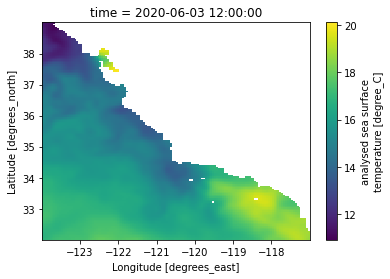

In [72]:
sst.isel(time=0).plot.imshow()

### Use a loop to plot all of the times 

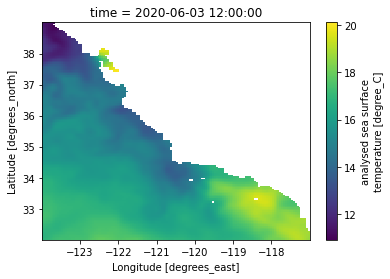

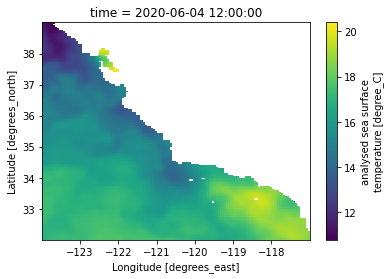

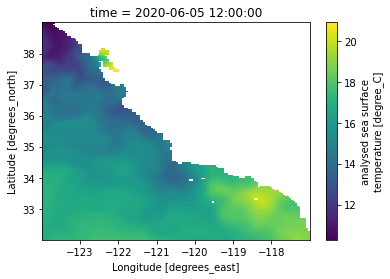

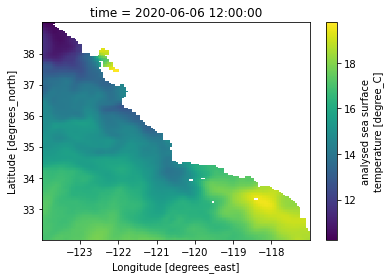

In [73]:
import matplotlib.pyplot as plt

for i in range(0,4):
    ax = plt.subplot()
    sst.isel(time=i).plot.imshow()
    plt.show()

## Calculate the mean value for each day 
* Use matplotlib.pyplot.plot_date() plot routine, which formats the x axis as a date
* Input sst.time for the x axis values
* Use the numpy mean() function to take the mean of the latitude longitude grid ( axis=(1,2) ) each time slice.

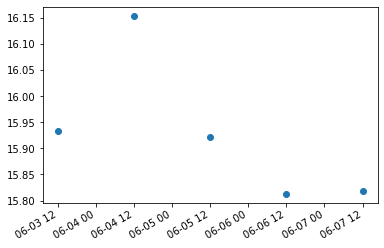

In [74]:
plt.plot_date(sst.time, sst.mean(axis=(1,2)), 'o')

# auto format the date label position on the x axis
plt.gcf().autofmt_xdate()

# Generate means for a ship station track 

## Load a station location file (.csv) with the time, latitude, and longitude coordinates for station locations

For this example the CSV file has three columns, with each row locating a station in time and space:  
`sample_date	sample_time	sample_lat	sample_lon`  
`6/3/20	        18:00	    37.3	    -123.2`

### Load the CSV file data using the Pandas module "read_csv".  
To use the date and time, we will need to create a Pandas date object. Pandas has a nice option (parse_dates) to create a column date objects from date and time field as the CSV file is loaded. We will also keep the original sample_date and sample_time by setting the keep_date_col to True.

### Xarray likes the date in a ISO 8601 date format, so we will also create an iso_date column

In [78]:
# Load the file into a Pandas data frame
# This create a date object column named 'sample_date_sample_time' 
track_DF = pd.read_csv('data/my_monterey_track.csv', parse_dates=[['sample_date', 'sample_time']], keep_date_col=True) 


# track_DF['iso_date'] = track_DF.sample_date_sample_time.dt.strftime('%Y-%m-%dT12:%M:%S')
track_DF['iso_date'] = track_DF.sample_date_sample_time.dt.strftime('%Y-%m-%d')
# Display the data
display(track_DF)

,sample_date_sample_time,sample_date,sample_time,sample_lat,sample_lon,iso_date
0,2020-06-03 18:00:00,6/3/20,18:00,37.3,236.8,2020-06-03
1,2020-06-04 19:34:00,6/4/20,19:34,36.1,237.5,2020-06-04
2,2020-06-05 20:15:00,6/5/20,20:15,34.4,238.2,2020-06-05
3,2020-06-06 18:45:00,6/6/20,18:45,32.2,239.8,2020-06-06
4,2020-06-07 12:52:00,6/7/20,12:52,31.9,240.9,2020-06-07
5,2020-06-08 14:23:00,6/8/20,14:23,31.9,241.8,2020-06-08


## Make the longitude format compatible with your dataset
### Some datasets use a -180°E to +180°E format  
* The 0° longitude is at the prime meridian (the location of the Royal Observatory, Greenwich, in London, England).  
* Longitudes west of 0° have a negative value.  
* Longitudes east of 0° have a positive value

### Some datasets use a 0°E to 360°E format  
* The 0° longitude is at the prime meridian  
* All longitudes have a positive value, increasing in value eastward of 0°.  
* Longitudes have a positive value

### The longitude formats used in this example are different
* Our station location longitudes above have values > 180, so they are using a 0 to 360 longitude format. 
* When we examined the global attributes for the satellite data, the longitude range showed a -18- t0 +180 format.  
longitude range: -179.975 to 179.975

Your station location longitudes need to be in the same format as the dataset. We can write a quick script to check if the dataset or the station location file have negative number, indicating a -180 to +180 longitude.  
* If both longitude lists have the same format, then the station location longitude are returned unchanged.
* If the dataset longitudes are -180 to 180 and the station location longitudes are 0-360, then 360 is subtracted from any station location longitude > 180
* If the dataset longitudes are 0 to 360 and the station location longitudes are -180 to 180, then 360 is is added to any station location longitude < 0  

### Create a function to correct the longitude format
Where:  
dataset_lon is the longitude column from the xarray data array ( sst['longitude'] )  
location_lon is the longitude column from the Pandas data frame, ( track_DF['sample_lon'] )  

In [79]:
def is_it_180_to_180(dataset_lon, location_lon):
    #long_array = False
    #long_array = np.any((da.longitude > 0))
    datasat_is = np.any((dataset_lon < 0))
    location_is = np.any((location_lon < 0))
    if datasat_is and location_is:
        return location_lon
    
    elif not datasat_is and location_is:
        return [ x if x>0 else x+360 for x in location_lon ]
    elif datasat_is and not location_is:
        return [ x if x<=180 else x-360 for x in location_lon ]


### Apply the longitude format correction function
Apply the dataset longitudes and the station location longitudes to the function and add the results to the Pandas data frame with the station information, with this useage:

In [80]:
track_DF['sample_lon_corrected'] = is_it_180_to_180(
                                                    sst['longitude'], 
                                                    track_DF['sample_lon']
                                                   )

track_DF

,sample_date_sample_time,sample_date,sample_time,sample_lat,sample_lon,iso_date,sample_lon_corrected
0,2020-06-03 18:00:00,6/3/20,18:00,37.3,236.8,2020-06-03,-123.2
1,2020-06-04 19:34:00,6/4/20,19:34,36.1,237.5,2020-06-04,-122.5
2,2020-06-05 20:15:00,6/5/20,20:15,34.4,238.2,2020-06-05,-121.8
3,2020-06-06 18:45:00,6/6/20,18:45,32.2,239.8,2020-06-06,-120.2
4,2020-06-07 12:52:00,6/7/20,12:52,31.9,240.9,2020-06-07,-119.1
5,2020-06-08 14:23:00,6/8/20,14:23,31.9,241.8,2020-06-08,-118.2


### Select an area around each box to get satellite data
* If you just use a single latitude and longitude pair to get the data, then the data from a single point will be returned. 
* To increase to chance getting data and improve your statistics, you can request a box of data around the station location, e.g. at latitude range and a longitude range.  

The box can increase by multiples of the geographical resolution of the dataset. For this dataset the spatial resolution was 0.05 degrees for the latitude and longitude. That is approximately 5 km resolution. So, a 5 pixel X 5 pixel box around each station location would result in a 25 x 25 km box (625 km^2) of data.  

Let's build a function to generate a latitude and longitude range box for each station location. The function asks for the following:  
* the station latitude and longitude
* The latitude and longitude spatial resolution of the satellite dataset. We obtained these values from the satellite dataset metadata.
    * da.geospatial_lat_resolution
    * da.geospatial_lon_resolution
* how many pixels you want added to each side of the latitude and longitude center point  
    * For example if you choose "2" for the latitude, then you will get a latitude range that covers five pixels: the station latitude for the center plus two pixel on each side. If you also choose "2" for the longitude, then you would get a 5x5 box around the station location. 
    * The default values for the function is "1", which is a 3x3 box  

Apply the dataset longitudes and the station location longitudes to the function below and add the results to the Pandas data frame with the station information, with this useage:
```
new_Pandas_dataframe_column = data_box(st_lat, st_lon, lat_res, lon_res, lat_pixels = 1, lon_pixels = 1)
```
where: 
* new_Pandas_dataframe_columns = track_DF['lat_min'], track_DF['lat_min'], track_DF['lon_min'], track_DF['lon_min']
* st_lat = the latitude column from the Pandas station location data frame, track_DF['sample_lat']
* st_lon = the longitude column from the Pandas station location data frame, track_DF['sample_lon_corrected']
    * make sure to use the corrected longitude column
* lat_res = the spatial resolution for satellite latitude, da.geospatial_lat_resolution
* lon_res = the spatial resolution for satellite longitude, da.geospatial_lon_resolution 
* lat_pixels = the number of pixels to add to each side of the latitude center point (default = 1) 
* lon_pixels = the number of pixels to add to each side of the longitude center point (default = 1)


In [81]:
def data_box(
             st_lat, st_lon, 
             lat_res, lon_res, 
             lat_pixels = 1, lon_pixels = 1
            ):
    
    lt_min = st_lat - lat_res * lat_pixels
    lt_max = st_lat + lat_res * lat_pixels
    ln_min = st_lon - lon_res * lon_pixels
    ln_max = st_lon + lon_res * lon_pixels

    return lt_min, lt_max, ln_min, ln_max
    

### Apply the dataset longitudes and the station location longitudes to the function  

Add the results to the Pandas data frame with the station information, with this useage:

new_Pandas_dataframe_column = data_box(st_lat, st_lon, lat_res, lon_res, lat_pixels = 1, lon_pixels = 1)
where:

In [82]:
# use the data_box function
[
 track_DF['lat_min'], track_DF['lat_max'],
 track_DF['lon_min'], track_DF['lon_max']
] = data_box(
             track_DF['sample_lat'], track_DF['sample_lon_corrected'],
             da.geospatial_lat_resolution, da.geospatial_lon_resolution,
             2, 2
            )
                                                                                              
track_DF                                                                                            

,sample_date_sample_time,sample_date,sample_time,sample_lat,sample_lon,iso_date,sample_lon_corrected,lat_min,lat_max,lon_min,lon_max
0,2020-06-03 18:00:00,6/3/20,18:00,37.3,236.8,2020-06-03,-123.2,37.2,37.4,-123.3,-123.1
1,2020-06-04 19:34:00,6/4/20,19:34,36.1,237.5,2020-06-04,-122.5,36.0,36.2,-122.6,-122.4
2,2020-06-05 20:15:00,6/5/20,20:15,34.4,238.2,2020-06-05,-121.8,34.3,34.5,-121.9,-121.7
3,2020-06-06 18:45:00,6/6/20,18:45,32.2,239.8,2020-06-06,-120.2,32.1,32.3,-120.3,-120.1
4,2020-06-07 12:52:00,6/7/20,12:52,31.9,240.9,2020-06-07,-119.1,31.8,32.0,-119.2,-119.0
5,2020-06-08 14:23:00,6/8/20,14:23,31.9,241.8,2020-06-08,-118.2,31.8,32.0,-118.3,-118.1


### Get the data for each station location and generate some basic statistic
#### We now have have functions and the input parameters needed to obtain satellite data for the cruise track
* Use the sample_date_sample_time, lat_min, lat_max, lon_min, and lon_max columns from the track_DF in the get_data() function to download satellite data for each station.
* Calculate the mean, standard deviation, and n stats, then add them to the track_DF

In [83]:
means = []
stdevs = []
ns = []

for index, row in track_DF.iterrows():
    
    my_data = get_data(da, my_var,
                       row['lat_min'], row['lat_max'], 
                       row['lon_min'], row['lon_max'], 
                       row['iso_date'], row['iso_date']
                      )
    
    means.append(np.nanmean(my_data, axis=(1,2))[0])
    stdevs.append(np.nanstd(my_data, axis=(1,2))[0])
    ns.append(np.count_nonzero(my_data, axis=(1,2))[0])

print('means', means)
print('stdevs', stdevs)
print('ns', ns)

    

means [14.251244, 14.836244, 16.224995, 16.861244, 17.026245, 17.41437]
stdevs [0.3615224, 0.12873788, 0.09499985, 0.048589565, 0.09873407, 0.10271109]
ns [16, 16, 16, 16, 16, 16]


### Add the statistics to the track_DF dataframe
Uncomment the last line to save the dataframe as a CSV file called 'mbnms_results.csv'

In [93]:
track_DF['mean'] = means
track_DF['stdev'] = stdevs
track_DF['n'] = ns
display(track_DF)

# uncomment to save the data
# track_DF.to_csv('crusetrack_results.csv', index = False)

,sample_date_sample_time,sample_date,sample_time,sample_lat,sample_lon,iso_date,sample_lon_corrected,lat_min,lat_max,lon_min,lon_max,mean,stdev,n
0,2020-06-03 18:00:00,6/3/20,18:00,37.3,236.8,2020-06-03,-123.2,37.2,37.4,-123.3,-123.1,14.251244,0.361522,16
1,2020-06-04 19:34:00,6/4/20,19:34,36.1,237.5,2020-06-04,-122.5,36.0,36.2,-122.6,-122.4,14.836244,0.128738,16
2,2020-06-05 20:15:00,6/5/20,20:15,34.4,238.2,2020-06-05,-121.8,34.3,34.5,-121.9,-121.7,16.224995,0.095000,16
3,2020-06-06 18:45:00,6/6/20,18:45,32.2,239.8,2020-06-06,-120.2,32.1,32.3,-120.3,-120.1,16.861244,0.048590,16
4,2020-06-07 12:52:00,6/7/20,12:52,31.9,240.9,2020-06-07,-119.1,31.8,32.0,-119.2,-119.0,17.026245,0.098734,16
5,2020-06-08 14:23:00,6/8/20,14:23,31.9,241.8,2020-06-08,-118.2,31.8,32.0,-118.3,-118.1,17.414370,0.102711,16


# Extract data from an irregular bounding box
Extract a timeseries of environmental data from an ERDDAP server within an irregular geographical bounding box (polygon), e.g. the boundaries of marine protected areaSimilar to the R rerddap-Xtractogon function

## The example uses a polygon that outlines the Monterey Bay Marine Protected Area.  

* **Load a csv file (shelf_boundary_gom.csv) that defines the polygon's latitude and longitude coordinate**   
The polygon is a series of longitude and latitude coordinates. If you connect the coordinate pairs, like a dot-to-dot puzzle, you create an outline of the Monterey Bay Marine Protected Area.

In [94]:
# Load CSV into Pandas
myPolygon = pd.read_csv('shapes/mbnms.csv')

# list the first 5 values as an example
myPolygon.head()

,Longitude,Latitude
0,-122.6275,37.88108
1,-122.6273,37.88096
2,-122.6269,37.88097
3,-122.6265,37.88077
4,-122.6260,37.88077


## Create a shape from the polygon using the "shapely" module

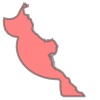

In [95]:
import shapely.vectorized
from shapely.geometry import Polygon

# Reform the csv data into lon, lat pairs
poly = list(zip(list(myPolygon.Longitude), list(myPolygon.Latitude)))

# create shape
polyshape = Polygon(poly)
polyshape

## Create a mask from the polygon object
* Make a copy of the SST data array
* Turn the array it a mask layer by finding all of pixels that are inside the polygon. Give these pixels a value of True. Cells outside the polygon have a value of False.
* Plot the mask on a map to see its location.

In [96]:
# Flatten and make a list of lomn/lat pairs. Transpose
# Make 2D grids of the lat and lon vectors
p_lons, p_lats = np.meshgrid(sst.longitude, sst.latitude)

mask = shapely.vectorized.contains(polyshape,  p_lons, p_lats)

## Create a masked version of the sst data area 
### Data outside of the Monterey Bay National Marine Sanctuary is masked out.
Plot the results

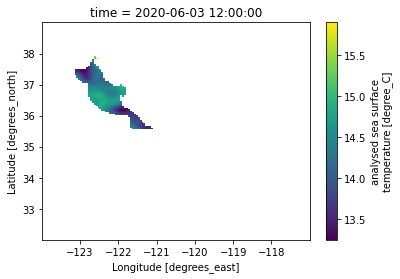

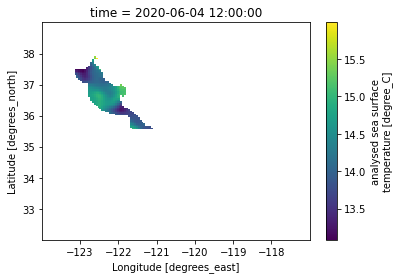

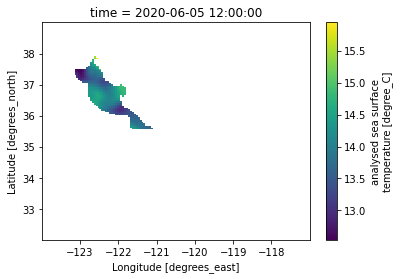

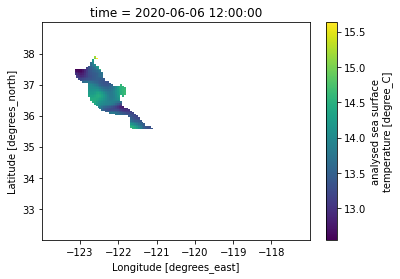

In [97]:
# Copy the sst data array
sst_masked = sst.copy(deep=True, data=None)

# Apply the mask to each time slice
for i in range(0, len(sst_masked.time)):
    sst_masked[i,:,:] = sst_masked.isel(time=i).where(mask == 1)

#Plot the results for each time slice
for i in range(0,4):
    ax = plt.subplot()
    sst_masked.isel(time=i).plot.imshow()
    plt.show()

In [98]:
## Create a new Pandas data frame for the masked data 


In [99]:
# create the data frame
masked_sst_df = pd.DataFrame()

# add the data
masked_sst_df["date"] = sst_masked.time
masked_sst_df["mean"] = sst_masked.mean(axis=(1,2))
masked_sst_df["stdev"] = sst_masked.std(axis=(1,2)) 
masked_sst_df["n"] = sst_masked.count(axis=(1,2)) 
# save as a csv file


# Display
display(masked_sst_df)



,date,mean,stdev,n
0,2020-06-03 12:00:00,14.259453,0.470414,554
1,2020-06-04 12:00:00,14.243837,0.517960,554
2,2020-06-05 12:00:00,13.877666,0.536191,554
3,2020-06-06 12:00:00,13.717341,0.478556,554
4,2020-06-07 12:00:00,13.524508,0.616973,554


## Plot the means

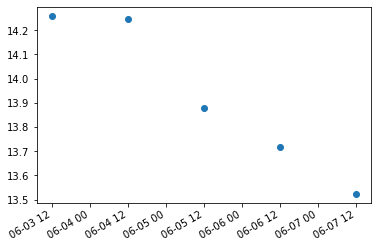

In [100]:

plt.plot_date(sst_masked.time, masked_sst_df["mean"], 'o')
plt.gcf().autofmt_xdate()

# uncomment to save the data
# track_DF.to_csv('mbnms_results.csv', index = False)

# Appendix

## Installation instruction are at these links
pandas: https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html   
numpy: https://numpy.org/install/  
xarray: http://xarray.pydata.org/en/latest/getting-started-guide/installing.html 